In [634]:
import plotly as py
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
from datetime import datetime
from openpyxl import load_workbook
from numpy import polyfit

In [639]:
os.getcwd()


'/Users/isacastro/Documents/Progammation/Pictet'

In [640]:
#cd
os.chdir('/Users/isacastro/Documents/Progammation/Pictet')

In [641]:
df = pd.read_excel(r"/Users/isacastro/Documents/Progammation/Pictet/case_study_input.xlsx")

In [642]:
df.head(10)

,Frequency,Monthly,Unnamed: 2,Unnamed: 3
0,Start date,1990-01-01 00:00:00,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Name,NaN,BR RETAIL SALES VOLA,NaN
3,Code,NaN,BRRETTOTG,BRRSr.saM
4,Adjustment,nsa,sa,sa
5,Date,serie_1,serie_2,serie_3
6,1990-01-01 00:00:00,106.228,-,49.7408
7,1990-02-01 00:00:00,92.1403,-,39.5901
8,1990-03-01 00:00:00,71.8598,-,33.4526
9,1990-04-01 00:00:00,82.059,-,37.8115


In [643]:
#subsetting the dataframe in order to have only rows with the useful data TS
df.columns = ['date', 's1', 's2', 's3']
df=df[6:]
df=df.reset_index(drop=True)
df

,date,s1,s2,s3
0,1990-01-01 00:00:00,106.228,-,49.7408
1,1990-02-01 00:00:00,92.1403,-,39.5901
2,1990-03-01 00:00:00,71.8598,-,33.4526
3,1990-04-01 00:00:00,82.059,-,37.8115
4,1990-05-01 00:00:00,94.5925,-,44.4412
...,...,...,...,...
359,2019-12-01 00:00:00,NaN,96.8,96.8
360,2020-01-01 00:00:00,NaN,95.4,95.4
361,2020-02-01 00:00:00,NaN,96.5,96.5
362,2020-03-01 00:00:00,NaN,93.4,93.4


# Find coeff

In [593]:
#creating dummies variables
n=len(df)
x=list(range(1, 13))
y=int(360/12)
x1=x*y
x2=[1,2,3,4] #because 2020 the year is not completeed
x=x1+x2
#put the list as a column in a df
df_2 = pd.DataFrame(x,columns=['month'])
df_2.index=df.index
df = pd.concat([df, df_2], axis=1, sort=False).reindex(df.index)

In [594]:
df

,date,s1,s2,s3,month
0,1990-01-01 00:00:00,106.228,-,49.7408,1
1,1990-02-01 00:00:00,92.1403,-,39.5901,2
2,1990-03-01 00:00:00,71.8598,-,33.4526,3
3,1990-04-01 00:00:00,82.059,-,37.8115,4
4,1990-05-01 00:00:00,94.5925,-,44.4412,5
...,...,...,...,...,...
359,2019-12-01 00:00:00,NaN,96.8,96.8,12
360,2020-01-01 00:00:00,NaN,95.4,95.4,1
361,2020-02-01 00:00:00,NaN,96.5,96.5,2
362,2020-03-01 00:00:00,NaN,93.4,93.4,3


In [595]:
# Set the date column as the index of the df
df=df.set_index('date')
#df.index = pd.to_datetime(df.index, format = '%Y-%m-%d').strftime('%Y-%m') #removing the day
df

,s1,s2,s3,month
date,,,,
1990-01-01,106.228,-,49.7408,1
1990-02-01,92.1403,-,39.5901,2
1990-03-01,71.8598,-,33.4526,3
1990-04-01,82.059,-,37.8115,4
1990-05-01,94.5925,-,44.4412,5
...,...,...,...,...
2019-12-01,NaN,96.8,96.8,12
2020-01-01,NaN,95.4,95.4,1
2020-02-01,NaN,96.5,96.5,2


In [596]:
#subsetting to have complete years
df_ols=df['1990-01':'2019-12']
df_ols


,s1,s2,s3,month
date,,,,
1990-01-01,106.228,-,49.7408,1
1990-02-01,92.1403,-,39.5901,2
1990-03-01,71.8598,-,33.4526,3
1990-04-01,82.059,-,37.8115,4
1990-05-01,94.5925,-,44.4412,5
...,...,...,...,...
2019-08-01,NaN,95.8,95.8,8
2019-09-01,NaN,96.5,96.5,9
2019-10-01,NaN,96.8,96.8,10


In [598]:
#first rows has a str as value
df[df == '-']=np.nan
#remplace the Nan by 0 to plot
df.fillna(float(0.0), inplace = True)
df

,s1,s2,s3,month
date,,,,
1990-01-01,106.227872,0.0,49.740811,1
1990-02-01,92.140308,0.0,39.590057,2
1990-03-01,71.859770,0.0,33.452574,3
1990-04-01,82.058970,0.0,37.811523,4
1990-05-01,94.592515,0.0,44.441156,5
...,...,...,...,...
2019-12-01,0.000000,96.8,96.800000,12
2020-01-01,0.000000,95.4,95.400000,1
2020-02-01,0.000000,96.5,96.500000,2


In [599]:
data = pd.DataFrame.from_dict(df_ols)
data = pd.concat((
   data,
 pd.get_dummies(df_ols['month'], drop_first=True)), axis=1)
data

,s1,s2,s3,month,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,,,,
1990-01-01,106.228,0,49.7408,1,0,0,0,0,0,0,0,0,0,0,0
1990-02-01,92.1403,0,39.5901,2,1,0,0,0,0,0,0,0,0,0,0
1990-03-01,71.8598,0,33.4526,3,0,1,0,0,0,0,0,0,0,0,0
1990-04-01,82.059,0,37.8115,4,0,0,1,0,0,0,0,0,0,0,0
1990-05-01,94.5925,0,44.4412,5,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,0,95.8,95.8,8,0,0,0,0,0,0,1,0,0,0,0
2019-09-01,0,96.5,96.5,9,0,0,0,0,0,0,0,1,0,0,0
2019-10-01,0,96.8,96.8,10,0,0,0,0,0,0,0,0,1,0,0


In [600]:
#find the best fit btw the independent and dependant variable
#res = sm.OLS('s3 ~  C(month)', data).fit()
#print(res.summary())

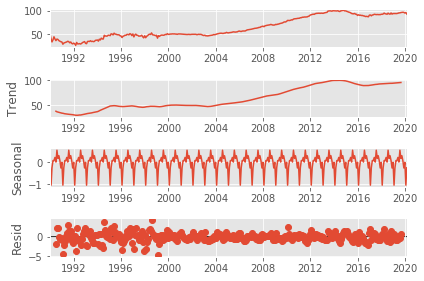

In [601]:
#subsetting the dataframe to have only 
df_court2=df['1990-01-01':'2020-03-01']
serie3= df_court2.loc[:,['s3']]
serie3
#deseasonnality for the first series before merging s1+s2
result = seasonal_decompose(serie3, model='additive',period=12)
result.plot()
plt.show()
#ok there is a seasonality

In [602]:
seasonal = result.seasonal
seasonal

date
1990-01-01    0.004147
1990-02-01   -1.036544
1990-03-01   -0.242800
1990-04-01    0.084184
1990-05-01    0.083293
                ...   
2019-11-01    0.078362
2019-12-01   -0.253634
2020-01-01    0.004147
2020-02-01   -1.036544
2020-03-01   -0.242800
Name: seasonal, Length: 363, dtype: float64

# Construction of the custom series

In [644]:
wb = load_workbook(filename = 'case_study_input.xlsx')
print(wb.sheetnames)
sheet_ranges=wb['Brasil-case1']
for x in range(1,370):
    vals=sheet_ranges.cell(row=x, column=4).value
    print(vals)
# one part we use the same values as for the serie 2 (with the new method used from 2000) 
# and for the other part we do a transformation --> using the YOY method ( ratio of the same month the next year * the value of the prior month)

['Brasil-case1']
None
None
None
None
BRRSr.saM
sa
serie_3
=B8*D20/B20
=B9*D21/B21
=B10*D22/B22
=B11*D23/B23
=B12*D24/B24
=B13*D25/B25
=B14*D26/B26
=B15*D27/B27
=B16*D28/B28
=B17*D29/B29
=B18*D30/B30
=B19*D31/B31
=B20*D32/B32
=B21*D33/B33
=B22*D34/B34
=B23*D35/B35
=B24*D36/B36
=B25*D37/B37
=B26*D38/B38
=B27*D39/B39
=B28*D40/B40
=B29*D41/B41
=B30*D42/B42
=B31*D43/B43
=B32*D44/B44
=B33*D45/B45
=B34*D46/B46
=B35*D47/B47
=B36*D48/B48
=B37*D49/B49
=B38*D50/B50
=B39*D51/B51
=B40*D52/B52
=B41*D53/B53
=B42*D54/B54
=B43*D55/B55
=B44*D56/B56
=B45*D57/B57
=B46*D58/B58
=B47*D59/B59
=B48*D60/B60
=B49*D61/B61
=B50*D62/B62
=B51*D63/B63
=B52*D64/B64
=B53*D65/B65
=B54*D66/B66
=B55*D67/B67
=B56*D68/B68
=B57*D69/B69
=B58*D70/B70
=B59*D71/B71
=B60*D72/B72
=B61*D73/B73
=B62*D74/B74
=B63*D75/B75
=B64*D76/B76
=B65*D77/B77
=B66*D78/B78
=B67*D79/B79
=B68*D80/B80
=B69*D81/B81
=B70*D82/B82
=B71*D83/B83
=B72*D84/B84
=B73*D85/B85
=B74*D86/B86
=B75*D87/B87
=B76*D88/B88
=B77*D89/B89
=B78*D90/B90
=B79*D91/B91
=B80*D92

In [604]:
for x in range(1,370):
    vals=sheet_ranges.cell(row=x, column=3).value
    print(vals)

None
None
None
BR RETAIL SALES VOLA
BRRETTOTG
sa
serie_2
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
49.5
50
50.3
50.3
50.7
50.5
50.7
50.3
50.3
49.7
50.5
50.6
50.5
50.3
50.1
49.9
49.5
49.4
49.2
49.3
49.5
49.7
49.2
49.6
49.8
49.7
49.8
49.8
49.8
48.9
49.5
49.9
49.4
49.8
48.7
47.8
47.1
47.9
46.6
46.6
46.3
46.6
47.1
47.5
47.8
48.1
49.2
48.9
49.4
50.3
50.8
51.1
51.8
52.1
52.1
51.7
51.8
52.4
52.6
53.9
53
52.8
53.3
53.5
53.8
54.5
55
54.8
54.5
54.9
55.1
56.2
56.8
56.1
55.8
56.7
56.9
56.8
56.9
58.1
59.2
59.5
59.9
60.2
60.6
61
61.6
62.1
62.7
62.8
63.2
63.7
64.6
64.6
66
66.6
67.2
66.1
67.8
68.4
69
69.3
69.6
70.1
71
70.3
69.6
69.6
69.9
71.1
70.7
71.5
71.8
72.7
73.2
73.6
74.3
75.7
76.4
76.2
77.6
79.6
79.4
79.3
79.9
80.8
80.6
82.4
83
83.1
83.4
83.9
84.1
84.3
85.3
85.4
86.4
86.4
86.9
86.8
87.1
87.2
88.3
89
9

In [558]:
#print(df.isnull().sum())
#print(df.dtypes)
#ok no need to use pd.to_datetime() already in a good format --> any date information should be formatted as a datetime64

In [559]:
#check the dataframe --> only numerical data
df.describe()


,s1,s2,s3,month
count,364.000000,364.000000,364.000000,364.000000
mean,72.775839,49.939011,63.663820,6.456044
std,54.334682,38.685546,22.895129,3.465015
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,47.694745,3.000000
50%,98.392575,53.150000,53.150000,6.000000
75%,107.926452,90.125000,90.125000,9.000000
max,179.071820,101.000000,101.000000,12.000000


In [561]:
# Set the date column as the index of the df
#df=df.set_index('date')
#df.index = pd.to_datetime(df.index, format = '%Y-%m-%d').strftime('%Y-%m') #removing the day
#df

In [562]:
#subsetting the dataframe to have only 
#df_court=df['1990-01':'1999-12']
#serie1= df_court.loc[:,['s1']]
#serie1

In [563]:
#deseasonnality for the first series before merging s1+s2
#result = seasonal_decompose(serie1, model='additive', freq=12)
#result.plot()
#plt.show()
#ok there is a seasonality

# Plot the serie 3

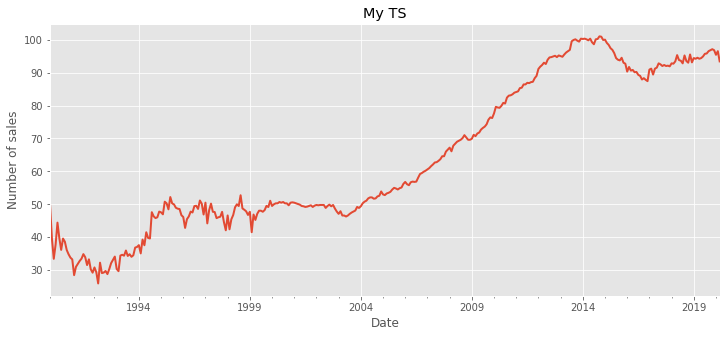

In [610]:
# Plot the time series 
ax=df['1990-01-01':'2020-03-01'].s3.plot(figsize=(12, 5), linewidth=2, fontsize=10)
plt.style.use('ggplot')
ax.set_title('My TS')
# Specify the x-axis label in your plot
ax.set_xlabel('Date')
# Specify the y-axis label in your plot
ax.set_ylabel('Number of sales')
# Show plot
plt.show()


# Functions

In [645]:
def scaling_one_fixed_factor (**kwargs):
    """ we expect to find two variables in kwargs:
- df_data_input: a serie/dataframe with the serie to transform
- factor : a fixed factor to scale the serie
""" 
    
    my_list=[]
    for key,value in kwargs.items():
        my_list.append(key)
        l=len(my_list)
    #require: 2 arguments --> one as int/float and another one as a dataframe
        if l==2:
            a=kwargs[my_list[0]]
            b=kwargs[my_list[1]]
            if type(a)==float or type(a)==int:
                if isinstance(b, pd.DataFrame)==True:#conditions fullfilled
                    b.fillna(float(0)) #Dealing with missing values
                    if isinstance(b.index, pd.DatetimeIndex)==True:
                        long=len(b.columns)
                        if long==1: #According to we suppose there is only a serie which needs to be transform
                            if b[b.columns[0]].dtypes=='float64' or b[b.columns[0]].dtypes=='int64':#check the column type
                                b["Tranformed_serie"]= b[b.columns[0]]*a
                                transformed_serie= b.loc[:,['Tranformed_serie']]
                        else:
                            print("df has several series")

            elif type(b)==float or type(b)==int:
                if isinstance(a, pd.DataFrame)==True:
                    a.fillna(float(0))
                    if isinstance(a.index, pd.DatetimeIndex)==True: 
                        long=len(a.columns)
                        if long==1:
                            if a[a.columns[0]].dtypes=='float64' or a[a.columns[0]].dtypes=='int64':
                                #a (here) is a dataframe with one column corresponding to the serie that will be transformed
                                a["Tranformed_serie"]= a[a.columns[0]]*b
                                transformed_serie= b.loc[:,['Tranformed_serie']]   
                        else:
                            print("df has several series")
    return transformed_serie

In [616]:
newdf= df.loc[:,['s1']]
hoje=scaling_one_fixed_factor(key2=6.0,key1=newdf)
hoje

,Tranformed_serie
date,
1990-01-01,637.367234
1990-02-01,552.841851
1990-03-01,431.158623
1990-04-01,492.353817
1990-05-01,567.555091
...,...
2019-12-01,0.000000
2020-01-01,0.000000
2020-02-01,0.000000


In [646]:
def scaling_one_dynamic_factor (data):
    col=data.shape[1]
    row=data.shape[0]
    une=data.index
    pt= pd.DataFrame(columns=['A_TRANSFORMED'], index=une)
    #according to the table = 1.0429
    fac=1.0429
    if col==2:
        if isinstance(data.index, pd.DatetimeIndex)==True:#it's a TS
            #we pretend that the dataframe has been cleaned before passing through the function: there are no character
            #and the nan have been filled with 0.0 
            if data[data.columns[0]].dtypes=='float64' or data[data.columns[0]].dtypes=='int64' and data.isnull().sum()==0 :
                if data[data.columns[1]].dtypes=='float64' or data[data.columns[1]].dtypes=='int64'and data.isnull().sum()==0:
                    for j in range(0,row):
                        if data.iloc[j][1]>=data.iloc[j][0] :
                            pt['A_TRANSFORMED'][j]= data.iloc[j][1]
                        else:
                            pt['A_TRANSFORMED'][j]= fac*data.iloc[j][0]
                           
    return pd.concat([data, pt], axis=1, sort=False) 
        

In [647]:
newdf2= df.loc[:,['s1','s2']]
newdf2

,s1,s2
0,106.228,-
1,92.1403,-
2,71.8598,-
3,82.059,-
4,94.5925,-
...,...,...
359,NaN,96.8
360,NaN,95.4
361,NaN,96.5
362,NaN,93.4


In [648]:
scaling_one_dynamic_factor(newdf2)

,s1,s2,A_TRANSFORMED
0,106.228,-,NaN
1,92.1403,-,NaN
2,71.8598,-,NaN
3,82.059,-,NaN
4,94.5925,-,NaN
...,...,...,...
359,NaN,96.8,NaN
360,NaN,95.4,NaN
361,NaN,96.5,NaN
362,NaN,93.4,NaN


In [624]:
def chaining (**kwargs):
    
    """ we expect to find one variable in kwargs:
df_data_input: a dataframe with the series to be chained.
""" 
    my_list=[]
    for key,value in kwargs.items():
        my_list.append(key)
        l=len(my_list)
    #require: one argument only as a Dataframe containing a serie or several series
        if l==1:
            a=kwargs[my_list[0]]
            pt= pd.DataFrame(columns=['CHAINED'], index=a.index)
            if isinstance(a, pd.DataFrame)==True:
                if isinstance(a.index, pd.DatetimeIndex)==True:
                    col=len(a.columns)
                    if col>=2: #min 2 series to be chained
                        row=a.shape[0]
                        for j in range(0,row):
                            for i in range(col-1,-1,-1):
                                #
                                if a.iloc[j][i]==0.0:
                                    if i!=0:
                                        i=i-1
                                elif a.iloc[j][i] != 0.0:
                                    pt['CHAINED'][j]=a.iloc[j][i]
                                    
                        chained_serie = pd.concat([a, pt], axis=1, sort=False)
                        
    return chained_serie

In [625]:
newdf3= df.loc[:,['s1','s2']]
newdf3

,s1,s2
date,,
1990-01-01,106.227872,0.0
1990-02-01,92.140308,0.0
1990-03-01,71.859770,0.0
1990-04-01,82.058970,0.0
1990-05-01,94.592515,0.0
...,...,...
2019-12-01,0.000000,96.8
2020-01-01,0.000000,95.4
2020-02-01,0.000000,96.5


In [626]:
chaining(key=newdf3)

,s1,s2,CHAINED
date,,,
1990-01-01,106.227872,0.0,106.228
1990-02-01,92.140308,0.0,92.1403
1990-03-01,71.859770,0.0,71.8598
1990-04-01,82.058970,0.0,82.059
1990-05-01,94.592515,0.0,94.5925
...,...,...,...
2019-12-01,0.000000,96.8,96.8
2020-01-01,0.000000,95.4,95.4
2020-02-01,0.000000,96.5,96.5
